#Trabalho da 3º unidade

**Alunos:** Gustavo Gorgônio, Letícia Pinheiro, Thayrone Santos e Wesley Silva

**Matrículas:** 2016045689, 20170059474, 2013017546, 2013005456 







##Início

A proposta deste trabalho é usar os dados abertos da UFRN para analisar a disciplina de Cálculo I nos semestres 2016.2, 2017.1 e 2017.2. Com esta análise, esperamos gerar gráficos com os seguintes assuntos:


*   Turma com melhor resultado por semestre
*   Unidade com a maior nota
*   Porcentagem dos desistentes
*   Quantidade de aprovados
*   Nota e média geral.
*   Visualização de Desempenho por turno e unidade



##Limpando o dataset

In [0]:
#Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as scp

Selecionando apenas o componente referente à disciplina a ser analisada:

In [0]:
#Componentes

#CODIGO DA DISCIPLINA A SER ANALISADA
codigo_disciplina = 'IMD0024'

#NIVEL DA DISCIPLINA 
nivel = 'G' 

#URL DE ONDE BAIXAR COMPONENTES
componentes_url ='http://dados.ufrn.br/dataset/3fea67e8-6916-4ed0-aaa6-9a8ca06a9bdc/resource/9a3521d2-4bc5-4fda-93f0-f701c8a20727/download/componentes-curriculares-presenciais.csv' 
#'http://bit.do/componentes_ufrn'

#COLUNAS A SEREM CONSIDERADAS
componentes_cols = ["id_componente","tipo_componente","codigo","nivel","nome","unidade_responsavel"]

#LENDO ARQUIVO VIA URL
componentes = pd.read_csv(componentes_url, sep=';', usecols=componentes_cols)

#FILTRANDO POR NÍVEL
componentes = componentes.loc[componentes['nivel']==nivel]

#TRATANDO DUPLICAÇÕES
componentes.dropna(inplace=True)
componentes = componentes[~componentes.id_componente.duplicated()]

#FILTRANDO PELO CÓDIGO DA DISCIPLINA
componentes = componentes.loc[componentes['codigo']==codigo_disciplina]

componentes


,id_componente,tipo_componente,codigo,nivel,nome,unidade_responsavel
21644,52662,MÓDULO,IMD0024,G,CÁLCULO DIFERENCIAL E INTEGRAL I,INSTITUTO METROPOLE DIGITAL


Selecionando todas as turmas do Campus Central da UFRN no nível de Graduação nos semestres 2016.2, 2017.1 e 2017.2:

In [0]:
#Turmas

#LOCAL DAS TURMAS
local = 'Campus Central'

#NIVEL DAS TURMAS
nivel = 'GRADUAÇÃO'

#URL DO ARQUIVO
turmas20171_url = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/5e77d066-d506-45eb-a21e-76aa79616fef/download/turmas-2017.1.csv'
turmas20172_url = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/01fe7343-fdf0-4a67-b915-2386b7c2fecb/download/turmas-2017.2.csv'
turmas20162_url = 'http://dados.ufrn.br/dataset/1938623d-fb07-41a4-a55a-1691f7c3b8b5/resource/5e8e3228-7f22-40a2-9efd-561c44844567/download/turmas-2016.2.csv'

#COLUNAS A SEREM CONSIDERADAS
turmas_cols = ["id_turma", "codigo_turma", "id_componente_curricular", "nivel_ensino", "campus_turma", "descricao_horario"]

#LENDO ARQUIVO VIA URL
turmas20171 = pd.read_csv(turmas20171_url, sep=';', usecols=turmas_cols)

#FILTRANDO LOCAL E NIVEL
turmas20171 = turmas20171.loc[turmas20171['campus_turma'] == local]
turmas20171 = turmas20171.loc[turmas20171['nivel_ensino'] == nivel]

#CONVERTANDO PARA FICAR NO MESMO FORMATO QUE O COMPONENTE
turmas20171.id_componente_curricular = turmas20171.id_componente_curricular.astype(str)

#RENOMEANDO PARA TER O MESMO NOME NA COLUNA
turmas20171.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas20171['Semestre'] = "2017.1"

turmas20171.head()



#LENDO ARQUIVO VIA URL
turmas20172 = pd.read_csv(turmas20172_url, sep=';', usecols=turmas_cols)

#FILTRANDO LOCAL E NIVEL
turmas20172 = turmas20172.loc[turmas20172['campus_turma'] == local]
turmas20172 = turmas20172.loc[turmas20172['nivel_ensino'] == nivel]

#CONVERTANDO PARA FICAR NO MESMO FORMATO QUE O COMPONENTE
turmas20172.id_componente_curricular = turmas20172.id_componente_curricular.astype(str)

#RENOMEANDO PARA TER O MESMO NOME NA COLUNA
turmas20172.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas20172['Semestre'] = "2017.2"

turmas20172.head()



#LENDO ARQUIVO VIA URL
turmas20162 = pd.read_csv(turmas20162_url, sep=';', usecols=turmas_cols)

#FILTRANDO LOCAL E NIVEL
turmas20162 = turmas20162.loc[turmas20162['campus_turma'] == local]
turmas20162 = turmas20162.loc[turmas20162['nivel_ensino'] == nivel]

#CONVERTANDO PARA FICAR NO MESMO FORMATO QUE O COMPONENTE
turmas20162.id_componente_curricular = turmas20162.id_componente_curricular.astype(str)

#RENOMEANDO PARA TER O MESMO NOME NA COLUNA
turmas20162.rename(columns={'id_componente_curricular': 'id_componente'}, inplace=True)
turmas20162['Semestre'] = "2016.2"

turmas20162.head()

,id_turma,codigo_turma,id_componente,nivel_ensino,campus_turma,descricao_horario,Semestre
157,57583715,01,21050,GRADUAÇÃO,Campus Central,2T2345,2016.2
158,57583716,01,24542,GRADUAÇÃO,Campus Central,35N34,2016.2
159,57583716,01,24542,GRADUAÇÃO,Campus Central,35N34,2016.2
160,57583717,01,26279,GRADUAÇÃO,Campus Central,6M34,2016.2
161,57583718,02,26279,GRADUAÇÃO,Campus Central,2N12,2016.2


Agora, juntando os dois datasets acima, temos um novo dataset apenas com as turmas de Cálculo

In [0]:
def qual_turno (horario):
  if 'm' in horario.lower():
    return "Manhã"
  elif 't' in horario.lower():
    return "Tarde"
  elif 'n' in horario.lower():
    return "Noite"
  else:
    return horario
  
def value_turno (str):
  if 'manhã' == str.lower():
    return 0
  elif 'tarde' == str.lower():
    return 1
  elif 'noite' == str.lower():
    return 2
  else:
    return 3

In [0]:
#REALIZANDO MERGE NAS COLUNAS

turmas_componentes_cols= ["id_turma", "nome", "codigo_turma", "id_componente", "nivel_ensino", "campus_turma", "descricao_horario", 'Semestre']
turmas_componentes20171 = pd.merge(turmas20171, componentes, on='id_componente')[turmas_componentes_cols]
turmas_componentes20172 = pd.merge(turmas20172, componentes, on='id_componente')[turmas_componentes_cols]
turmas_componentes20162 = pd.merge(turmas20162, componentes, on='id_componente')[turmas_componentes_cols]

turmas_componentes20171['Turno'] = turmas_componentes20171['descricao_horario'].map(lambda x: qual_turno(x))
turmas_componentes20171['Turno_Com_hora'] =  turmas_componentes20171['descricao_horario'].map(lambda x: str(x)[:-26])

turmas_componentes20172['Turno'] = turmas_componentes20172['descricao_horario'].map(lambda x: qual_turno(x))
turmas_componentes20172['Turno_Com_hora'] =  turmas_componentes20172['descricao_horario'].map(lambda x: str(x)[:-26])

turmas_componentes20162['Turno'] = turmas_componentes20162['descricao_horario'].map(lambda x: qual_turno(x))
turmas_componentes20162['Turno_Com_hora'] =  turmas_componentes20162['descricao_horario'].map(lambda x: str(x)[:-26])


frames = [turmas_componentes20171, turmas_componentes20172, turmas_componentes20162]

turmas_componentes = pd.concat(frames)

turmas_componentes.head()

,id_turma,nome,codigo_turma,id_componente,nivel_ensino,campus_turma,descricao_horario,Semestre,Turno,Turno_Com_hora
0,57597581,CÁLCULO DIFERENCIAL E INTEGRAL I,01,52662,GRADUAÇÃO,Campus Central,246M34 (13/02/2017 - 01/07/2017),2017.1,Manhã,246M34
1,57597582,CÁLCULO DIFERENCIAL E INTEGRAL I,02,52662,GRADUAÇÃO,Campus Central,246T12 (13/02/2017 - 01/07/2017),2017.1,Tarde,246T12
2,57597583,CÁLCULO DIFERENCIAL E INTEGRAL I,03,52662,GRADUAÇÃO,Campus Central,246N34 (13/02/2017 - 01/07/2017),2017.1,Noite,246N34
0,57608392,CÁLCULO DIFERENCIAL E INTEGRAL I,01,52662,GRADUAÇÃO,Campus Central,246T12 (24/07/2017 - 16/12/2017),2017.2,Tarde,246T12
1,57608393,CÁLCULO DIFERENCIAL E INTEGRAL I,02,52662,GRADUAÇÃO,Campus Central,246M34 (24/07/2017 - 16/12/2017),2017.2,Manhã,246M34


Pegando as informações de Matrículas dos períodos:

In [0]:
#Notas e componentes

matriculas_url20171 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/79071c21-e32c-438f-b930-d1b6ccc02ec2/download/matricula-componente-20171.csv'
matriculas_url20172 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/55dfe713-ff7c-4fa8-8d1d-d4294a025bff/download/matricula-componente-20172.csv'
matriculas_url20162 = 'http://dados.ufrn.br/dataset/c8650d55-3c5a-4787-a126-d28a4ef902a6/resource/f6179838-b619-4d7d-af9c-18c438b80dd4/download/matriculas-de-2016.2.csv'

matriculas20171 = pd.read_csv(matriculas_url20171, sep=';')

matriculas20172 = pd.read_csv(matriculas_url20172, sep=';')

matriculas20162 = pd.read_csv(matriculas_url20162, sep=';')


frames = [matriculas20171, matriculas20172, matriculas20162]

matriculas = pd.concat(frames)

matriculas.head()

,Unnamed: 10,descricao,discente,faltas_unidade,id_curso,id_turma,media_final,nota,numero_total_faltas,reposicao,unidade
0,NaN,APROVADO,880d7ee5080d3b969bf45556f95ac6b4,0.0,2000057.0,57597218,8.9,8.7,0.0,f,1.0
1,NaN,APROVADO,880d7ee5080d3b969bf45556f95ac6b4,0.0,2000057.0,57597218,8.9,10.0,0.0,f,3.0
2,NaN,APROVADO,880d7ee5080d3b969bf45556f95ac6b4,0.0,2000057.0,57597218,8.9,8.0,0.0,f,2.0
3,NaN,APROVADO,07feb1dc40e26ad43ecb18608f102c49,0.0,2000057.0,57597218,9.0,8.1,0.0,f,1.0
4,NaN,APROVADO,07feb1dc40e26ad43ecb18608f102c49,0.0,2000057.0,57597218,9.0,10.0,0.0,f,3.0


Realizando merge da turma com as matriculas, finalizando com um dataset que possui apenas os alunos matriculados por turma:

In [0]:
alunos_turma_cols = ['id_turma', 'nome', 'descricao_horario', 'Turno','Turno_Com_hora','discente', 'unidade', 'nota', 'reposicao', 'media_final', 'descricao', 'Semestre']

alunos_turma = pd.merge(turmas_componentes, matriculas, on='id_turma')[alunos_turma_cols]

alunos_turma = alunos_turma.dropna(how='any',axis=0)

alunos_turma['unidade'] = alunos_turma['unidade'].astype(np.int64)

alunos_turma.head()

,id_turma,nome,descricao_horario,Turno,Turno_Com_hora,discente,unidade,nota,reposicao,media_final,descricao,Semestre
0,57597581,CÁLCULO DIFERENCIAL E INTEGRAL I,246M34 (13/02/2017 - 01/07/2017),Manhã,246M34,e381d3914b49c2b9dee37cc30438c7fb,3,0.0,f,0.0,CANCELADO,2017.1
1,57597581,CÁLCULO DIFERENCIAL E INTEGRAL I,246M34 (13/02/2017 - 01/07/2017),Manhã,246M34,e381d3914b49c2b9dee37cc30438c7fb,2,0.0,f,0.0,CANCELADO,2017.1
2,57597581,CÁLCULO DIFERENCIAL E INTEGRAL I,246M34 (13/02/2017 - 01/07/2017),Manhã,246M34,e381d3914b49c2b9dee37cc30438c7fb,1,0.0,f,0.0,CANCELADO,2017.1
3,57597581,CÁLCULO DIFERENCIAL E INTEGRAL I,246M34 (13/02/2017 - 01/07/2017),Manhã,246M34,f8fbf27b209754521cdbc40840a5a8c3,2,5.5,f,5.6,APROVADO POR NOTA,2017.1
4,57597581,CÁLCULO DIFERENCIAL E INTEGRAL I,246M34 (13/02/2017 - 01/07/2017),Manhã,246M34,f8fbf27b209754521cdbc40840a5a8c3,1,3.0,f,5.6,APROVADO POR NOTA,2017.1


##Turma com melhor resultado por semestre

Neste tópico, queremos ver qual turma obteve melhor resultado em cada semestre, analisando suas médias. 

Observando os gráficos, percebemos que independente da turma e do semestre, nenhuma média chega perto de 10. Também vemos que as médias dos extremos foram da turma da manhã, sendo a maior em 2016.2, e a menor no semestre seguinte, em 2017.1.



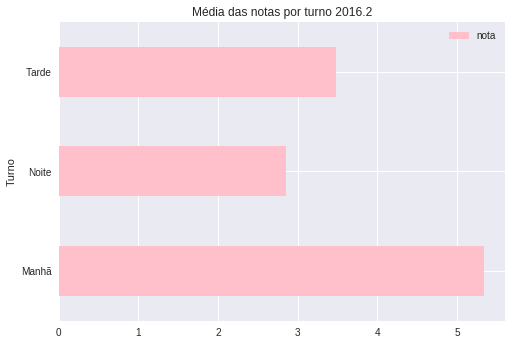

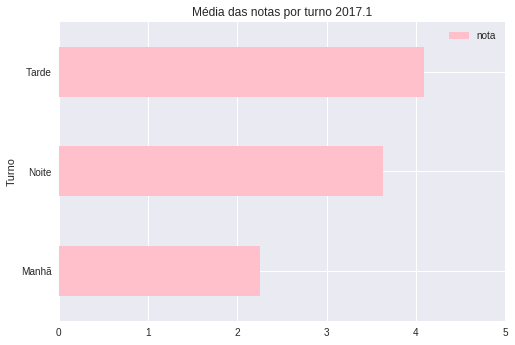

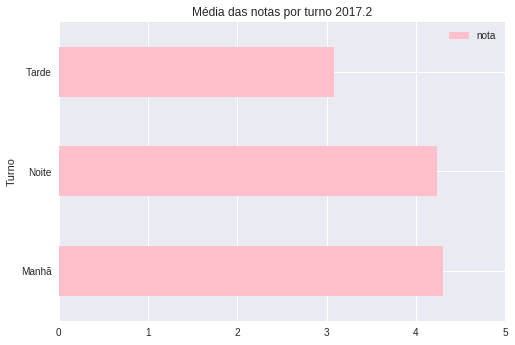

In [0]:
pd.DataFrame(alunos_turma.loc[alunos_turma['Semestre'] == '2016.2'].groupby('Turno')['nota'].mean()).plot.barh(color='pink')
plt.title('Média das notas por turno 2016.2')
sns.set_style("darkgrid")
plt.show()

pd.DataFrame(alunos_turma.loc[alunos_turma['Semestre'] == '2017.1'].groupby('Turno')['nota'].mean()).plot.barh(color='pink')
plt.title('Média das notas por turno 2017.1')
plt.xlim(0,5)
sns.set_style("darkgrid")
plt.show()


pd.DataFrame(alunos_turma.loc[alunos_turma['Semestre'] == '2017.2'].groupby('Turno')['nota'].mean()).plot.barh(color='pink')
plt.title('Média das notas por turno 2017.2')
plt.xlim(0,5)
sns.set_style("darkgrid")
plt.show()

##Unidade com a maior nota

Após descobrimos como é o desempenho dos alunos por turnos, surgiu a curiosidade de saber em qual unidade eles possuem uma maior facilidade.
Chegamos a conclusão que o alunos conseguem um rendimento satisfatório na primeira unidade nos semestres analisados, mas, esse indice tende a cair ao longo das unidades (principalmente na terceira).

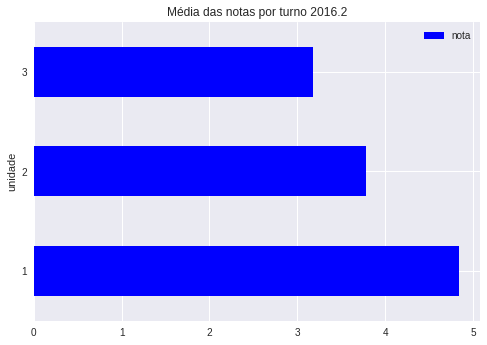

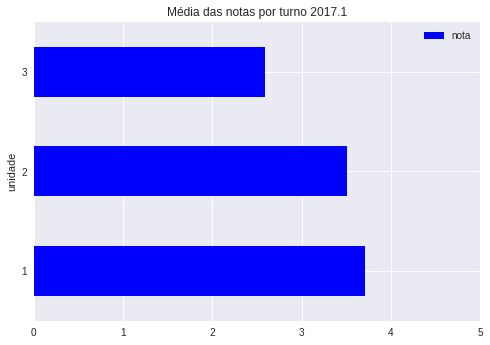

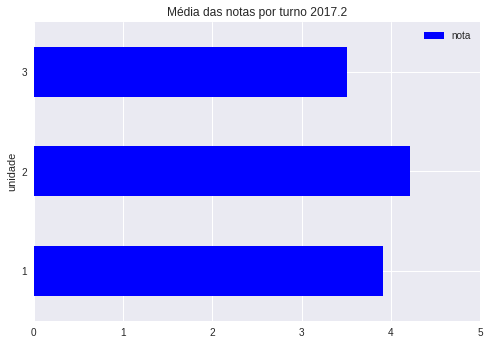

In [0]:
pd.DataFrame(alunos_turma.loc[alunos_turma['Semestre'] == '2016.2'].groupby('unidade')['nota'].mean()).plot.barh(color='blue')
plt.title('Média das notas por turno 2016.2')
sns.set_style("darkgrid")
plt.show()

pd.DataFrame(alunos_turma.loc[alunos_turma['Semestre'] == '2017.1'].groupby('unidade')['nota'].mean()).plot.barh(color='blue')
plt.title('Média das notas por turno 2017.1')
plt.xlim(0,5)
sns.set_style("darkgrid")
plt.show()


pd.DataFrame(alunos_turma.loc[alunos_turma['Semestre'] == '2017.2'].groupby('unidade')['nota'].mean()).plot.barh(color='blue')
plt.title('Média das notas por turno 2017.2')
plt.xlim(0,5)
sns.set_style("darkgrid")
plt.show()

##Porcentagem dos desistentes

Estes gráficos de pizza mostram a porcentagem de desistentes. Ou seja, alunos que cancelaram a matrícula ou reprovaram por média e por falta. 

Com estas duas informações, conseguimos presumir o quanto o aluno sequer tentou (ou não) cursar a disciplina, pois há um prazo para o seu cancelamento. Aqueles que cancelaram a matrícula - que foi a maior porcentagem em todos os semestres - desistiram logo, enquanto os que reproveram por média e por falta persistiram um pouco mais.

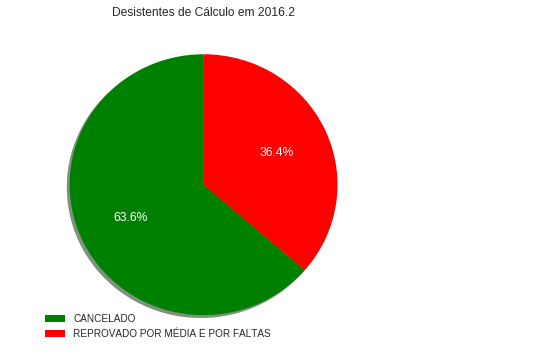

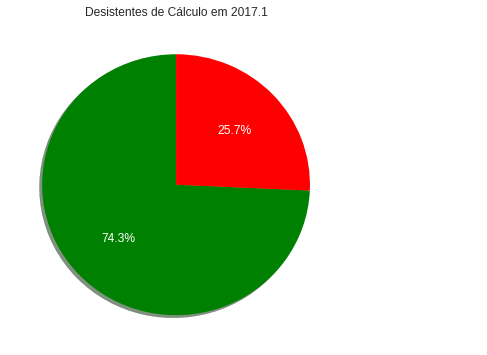

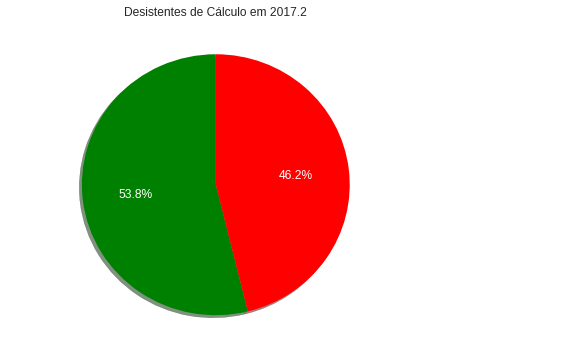

In [0]:
colors = ['green', 'red']

desistentes20171 = alunos_turma.loc[alunos_turma['Semestre'] == '2017.1']['descricao'].value_counts().loc[['CANCELADO','REPROVADO POR MÉDIA E POR FALTAS']]
desistentes20172  = alunos_turma.loc[alunos_turma['Semestre'] == '2017.2']['descricao'].value_counts().loc[['CANCELADO','REPROVADO POR MÉDIA E POR FALTAS']]
desistentes20162  = alunos_turma.loc[alunos_turma['Semestre'] == '2016.2']['descricao'].value_counts().loc[['CANCELADO','REPROVADO POR MÉDIA E POR FALTAS']]

desistentes20162.plot.pie(title='Desistentes de Cálculo em 2016.2', figsize=(6,6), label='',shadow = True, startangle = 90, colors = colors, autopct = '%1.1f%%', textprops=dict(color="w"), legend=True)
plt.show()

desistentes20171.plot.pie(title='Desistentes de Cálculo em 2017.1', figsize=(6,6), label='',shadow = True, startangle = 90, colors = colors, autopct = '%1.1f%%', textprops=dict(color="w"))
plt.show()

desistentes20172.plot.pie(title='Desistentes de Cálculo em 2017.2', figsize=(6,6), label='',shadow = True, startangle = 90, colors = colors, autopct = '%1.1f%%', textprops=dict(color="w"))

plt.show()

##Quantidade de aprovados

Vamos agora usar o desvio padrão das médias finais dos alunos dessas turmas para ver a distribuição dos aprovados por nota e aprovados com nota igual ou acima de 7.0 para gerar um gráfico z-score e assim ver se existe algum turno em que o rendimento dos alunos é notoriamente melhor ou pior do que nos outros turnos

In [0]:
# Função gera gráficos do z-score da turma desejada turno por turno
def plot_zscore_turnos(dados):
  
  turnos = dados.Turno.unique()
  
  fig, axes = plt.subplots(nrows=1, ncols=len(turnos), figsize=(len(turnos) * 8, 5))

  alunos_tentaram = dados.loc[dados['descricao'] != 'CANCELADO']
  alunos_tentaram = alunos_tentaram.loc[alunos_tentaram['descricao'] != 'REPROVADO POR MÉDIA E POR FALTAS']

  alunos_tentaram['desvio padrão'] = scp.stats.zscore(alunos_tentaram['media_final'])
  alunos_tentaram.sort_values(by=['desvio padrão'], inplace=True)

  # Plotando gráficos das turmas por turnos
  for i in range(len(turnos)):
    # Filtrando o dataframe por turno
    aux_alunos_tentaram = alunos_tentaram.loc[alunos_tentaram['Turno'] == turnos[i]]

    # Pegando os valores do desvio padrão para o primeiro aluno aprovado por nota e também para o primeiro aprovado
    aprovado_nota = aux_alunos_tentaram.loc[aux_alunos_tentaram['descricao'] == 'APROVADO POR NOTA'].iloc[0]['desvio padrão']
    aprovado = aux_alunos_tentaram.loc[aux_alunos_tentaram['descricao'] == 'APROVADO'].iloc[0]['desvio padrão']

    
    # Configurando o gráfico
    
    # Essa parte é necessária para caso de ter apenas um turno, porque para o caso de apenas um subplot não podemos idexalo 
    if len(turnos) == 1:
      ax = aux_alunos_tentaram['desvio padrão'].plot(kind='kde', title=turnos[i], legend=False)
    else:
      ax = aux_alunos_tentaram['desvio padrão'].plot(kind='kde', title=turnos[i], legend=False, ax=axes[i])
    
    ax.axvline(aprovado_nota,color='red',label='Aprovado por nota')
    ax.axvline(aprovado,color='green',label='Aprovado')
    ax.axvline(0.0,color='blue',label='Média da turma')
    
    # Configurando legendas e rótulos
    if i == 0:
      ax.set_ylabel(ylabel = "Densidade de alunos")
    else:
      ax.set_ylabel(ylabel = '')
      
    if i == len(turnos)//2:
      ax.set_xlabel(xlabel = "Distância do desvio padrão em relação a média")

    for key, spine in ax.spines.items():
      spine.set_visible(False)

    if i == len(turnos) - 1:
      ax.legend(fontsize='x-small',loc='best')


  plt.show()

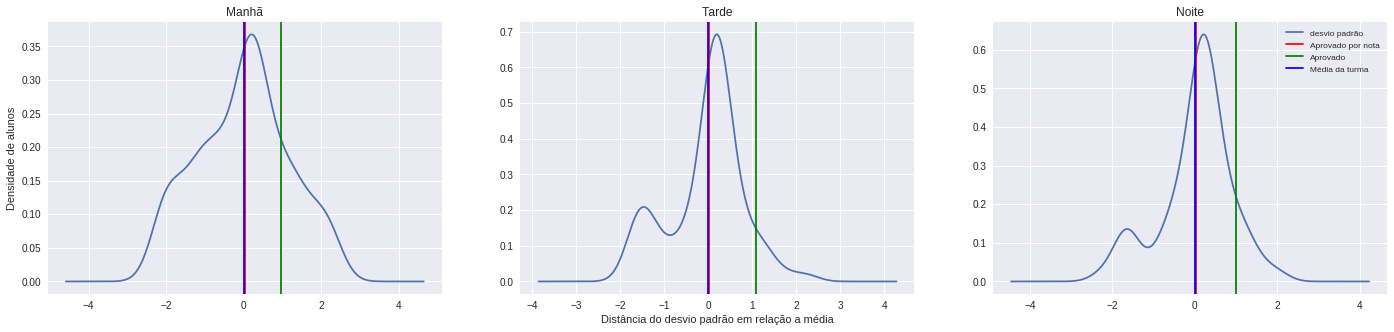

In [0]:
# Gerando o z-score da turma em função dos turnos
plot_zscore_turnos(alunos_turma)


*   Com esse gráfico podemos notar que para qualquer turno os alunos aprovados, por nota ou não, estão acima da média da turma mesmo que bem próximos
*   Também podemos notar que a reta dos aprovados por nota (reta vermelha) é mais ou menos igual em todos os gráficos
*   E podemos concluir também que o melhor turno seria o da manhã, porque a distância do desvio padrão dos aprovados (reta verde) até a média da turma (reta azul) é a menor, ou seja, esses alunos tiveram um rendimento melhor em relação aos alunos dos outros turnos



##Nota e média geral

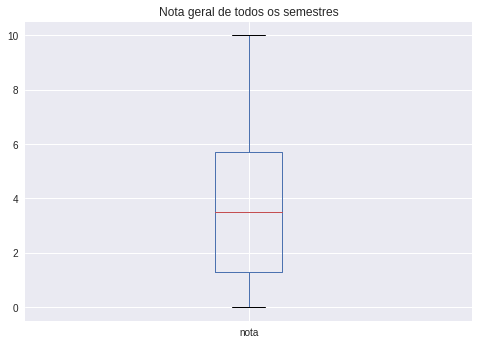

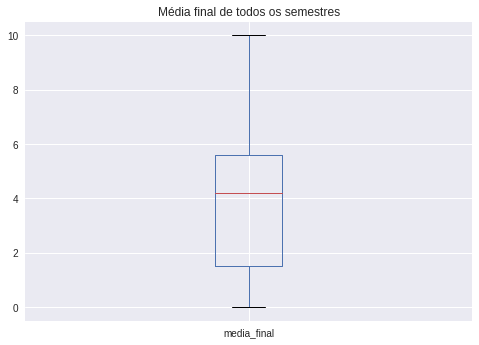

In [0]:
alunos_turma.nota.plot(kind='box', title='Nota geral de todos os semestres')
plt.show()


alunos_turma.media_final.plot(kind='box', title='Média final de todos os semestres')
plt.show()

##Visualização de Desempenho por turno e unidade

Bloxplot exibindo como desempenharam as turmas divididos por tumas e unidade, onde é possível ver a divisão em quartis de cada nota. É possível ver que um dos melhores quartis é da Unidade 1 na Turma da Manhã em 2016.2 e um dos piores é o da Manhã 2017.1 



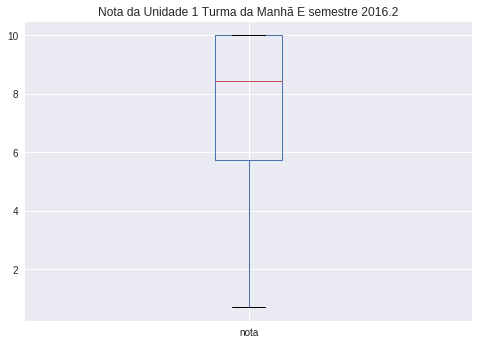

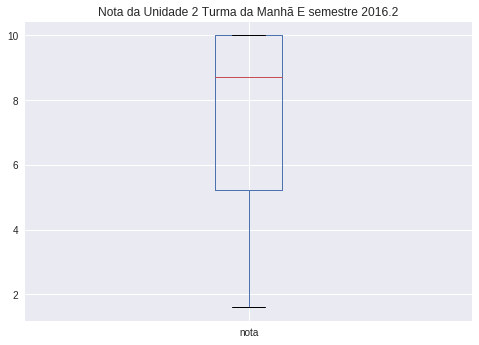

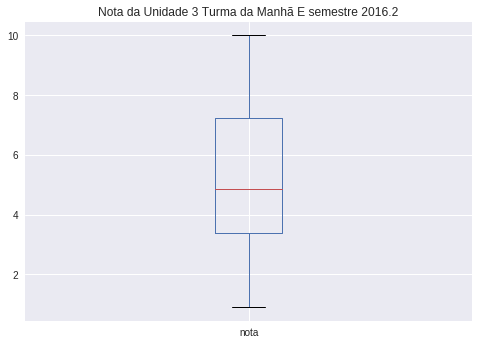

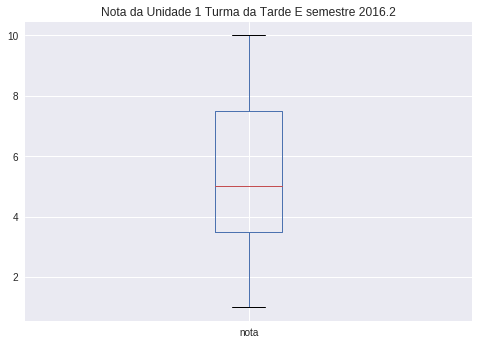

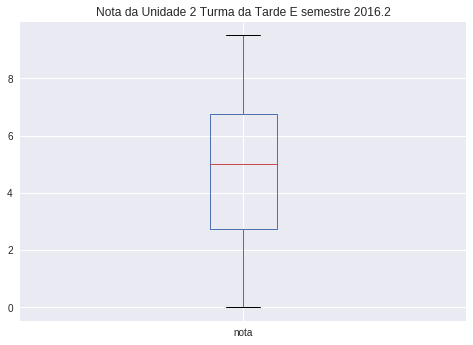

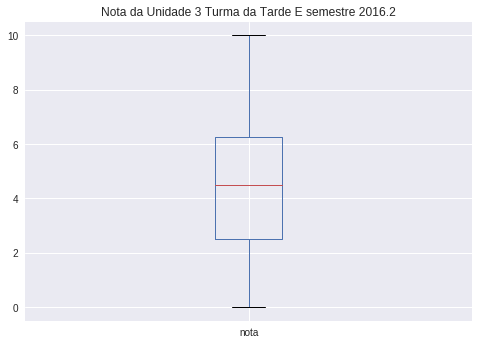

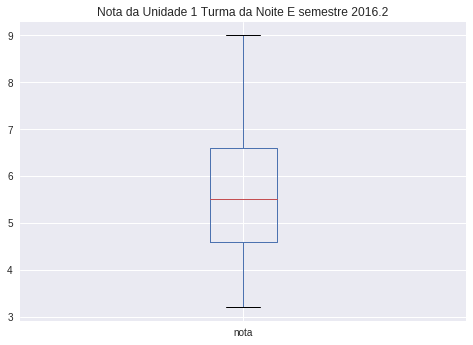

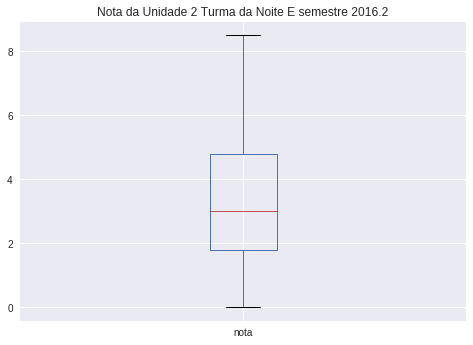

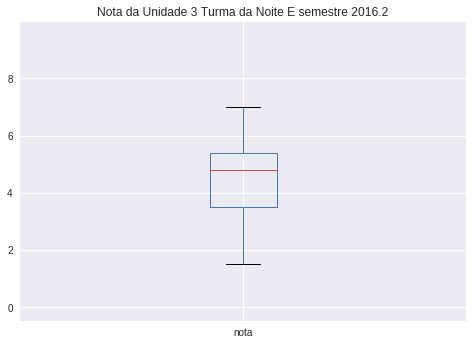

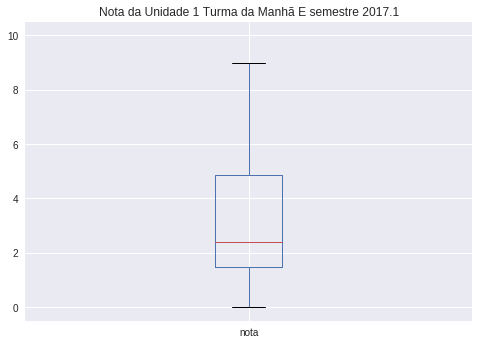

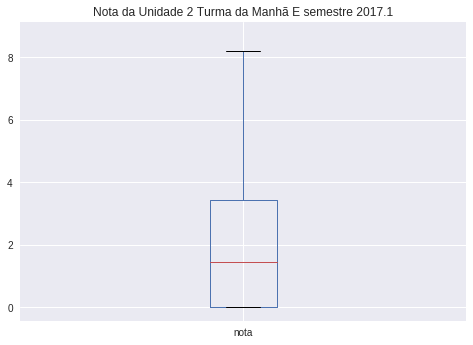

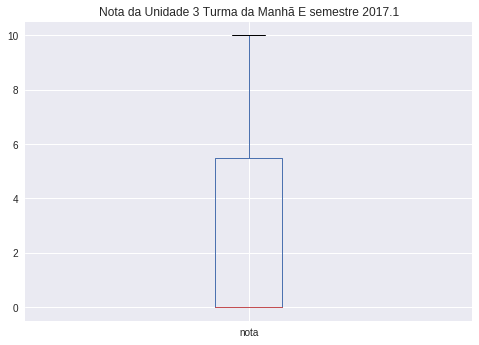

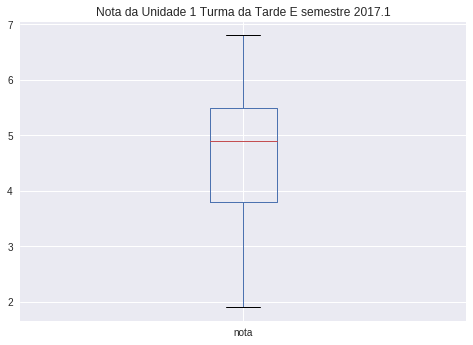

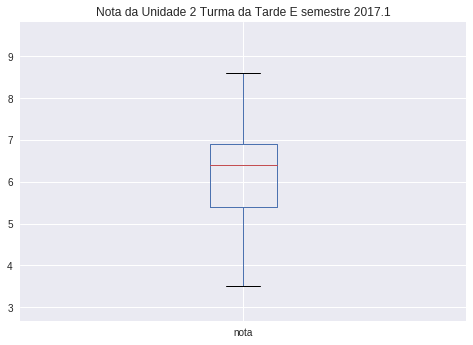

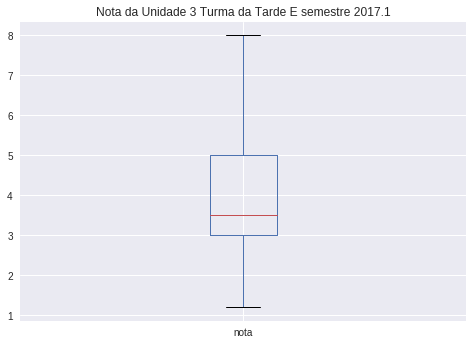

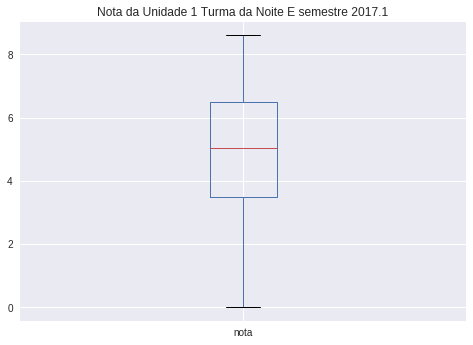

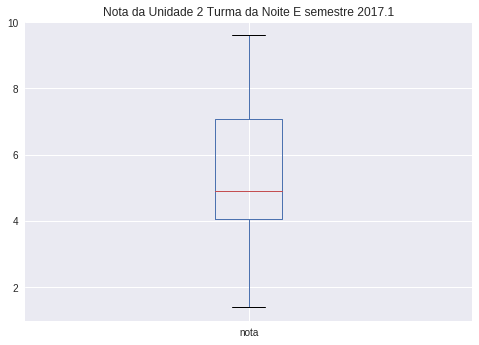

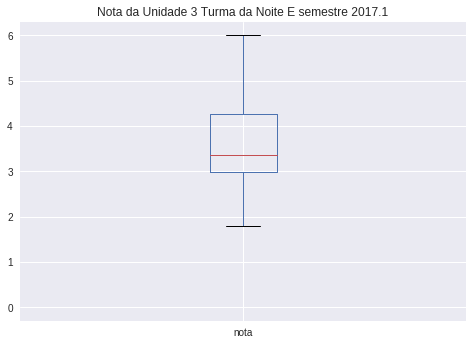

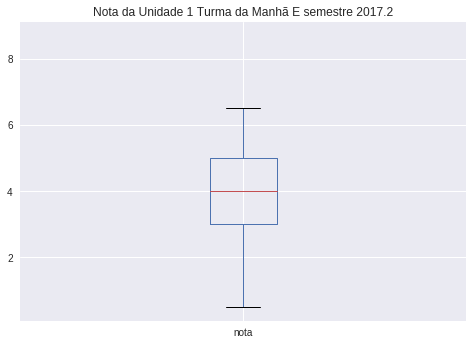

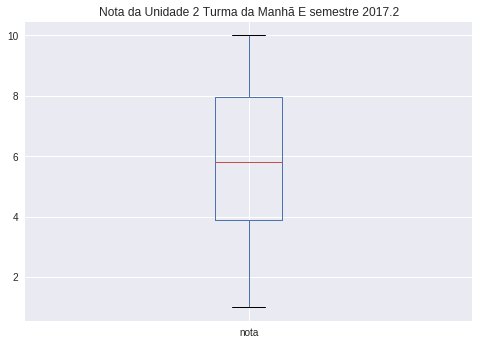

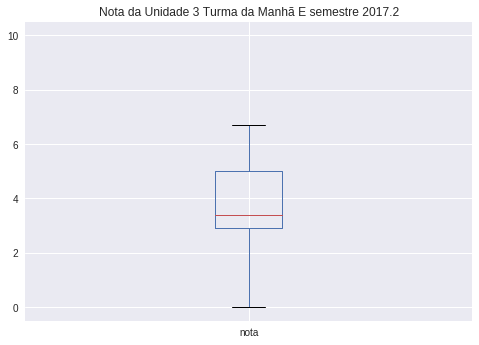

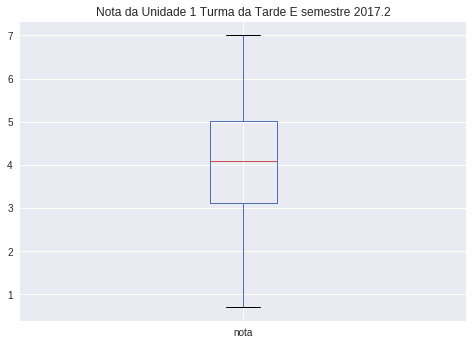

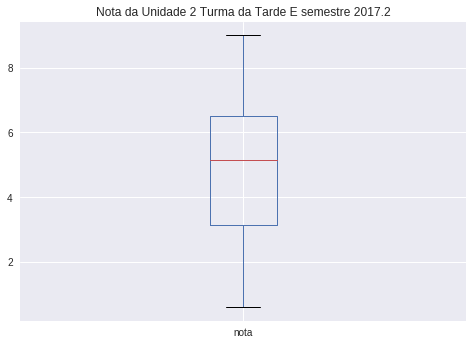

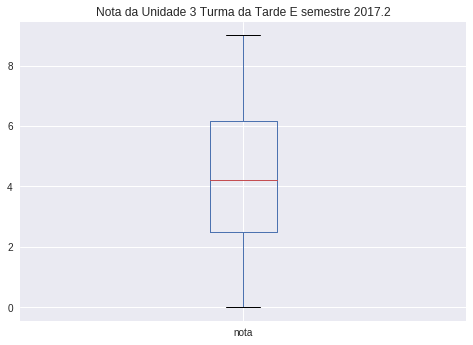

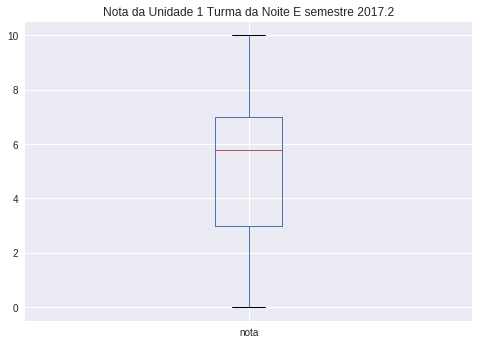

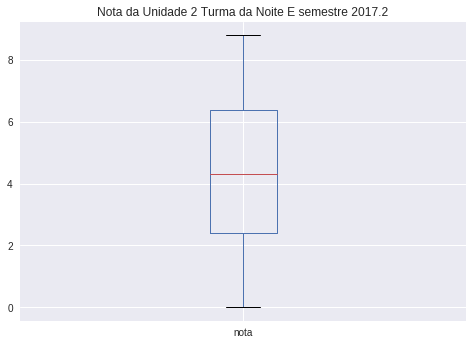

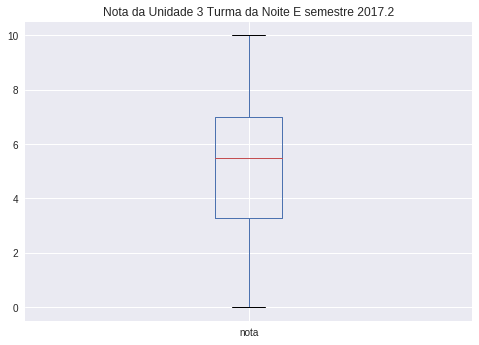

In [0]:
Turno = ['Manhã', 'Tarde', 'Noite']
Semestre = ['2016.2','2017.1','2017.2']

def TurmaSemReprovados(t, s, alunos):
  TurmaBox = alunos.loc[alunos['Semestre'] == s].loc[alunos['Turno']==t]
  TurmaBox = TurmaBox.drop(TurmaBox[TurmaBox['descricao']=='CANCELADO'].index)
  TurmaBox = TurmaBox.drop(TurmaBox[TurmaBox['descricao']=='REPROVADO POR MÉDIA E POR FALTAS'].index)
  return TurmaBox


j = 0
k = 0
while k < len(Semestre):
  while j < len(Turno):
    for i in range(0, 3):
      Turma = TurmaSemReprovados(Turno[j], Semestre[k], alunos_turma)
      Turma.loc[Turma.unidade == i+1].nota.plot(kind='box', title='Nota da Unidade '+str(i+1) + ' Turma da ' + Turno[j] + " E semestre " + Semestre[k])
      plt.show()  
    j += 1
  k +=1
  j = 0
  